In [1]:
import sys;sys.path.append('../')
from api.models.recipe_gpt import RecipeImporter
import json,tiktoken
enc = tiktoken.get_encoding("gpt2")
importer = RecipeImporter()
print(importer.setting)

以下のJson形式に基づいて、レシピJsonを出力してください。数値がわからない場合は、nullとしてください。
{
    "name": "レシピ名",
    "description": "レシピの説明",
    "image": "レシピ画像URL",
    "cooking_time": "調理時間",
    "dish_types": ["主菜・副菜などの種類"],
    "cuisine_types": ["料理の国籍・地域"],
    "nutrition": {
        "calorie": 0,
        "protein": 0.0,
        "lipid": 0.0,
        "carbohydrate": 0.0,
        "sugar": 0.0,
        "dietary_fiber": 0.0,
        "salt": 0.0
    },
    "appliances": [
        "調理器具"
    ],
    "ingredients": [
        {
            "name": "材料名",
            "amount": "分量表記",
            "g": 0
        }
    ],
    "steps": [
        "手順の説明"
    ]
}




## text_to_recipe

In [2]:
from bs4 import BeautifulSoup
import requests
url = "https://www.lettuceclub.net/recipe/dish/22978/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
recipe_text = soup.get_text().replace('\n\n','')
# 文字数制限があるため、不要部分をカット
end = 'ほかのレシピをもっと見る'
recipe_text = recipe_text[:recipe_text.find(end)]
print(len(enc.encode(recipe_text)))
# print(recipe_text)

2480


In [3]:
recipe = importer.text_to_recipe(recipe_text)
print(json.dumps(recipe,indent=4,ensure_ascii=False))

{
    "name": "簡単タコライス",
    "description": "時短で作れるタコライスのレシピです。",
    "image": null,
    "cooking_time": "15分",
    "dish_types": [
        "ごはんもの",
        "アレンジご飯",
        "タコライス",
        "お弁当のメインおかず"
    ],
    "cuisine_types": [
        "エスニック"
    ],
    "nutrition": {
        "calorie": 742,
        "protein": 2.4,
        "lipid": null,
        "carbohydrate": null,
        "sugar": null,
        "dietary_fiber": null,
        "salt": null
    },
    "appliances": [
        "フライパン"
    ],
    "ingredients": [
        {
            "name": "合いびき肉",
            "amount": "180g",
            "g": 180
        },
        {
            "name": "トッピング用チーズ",
            "amount": "適量",
            "g": null
        },
        {
            "name": "玉ねぎのみじん切り",
            "amount": "1/3個分",
            "g": null
        },
        {
            "name": "トマト",
            "amount": "1/2個",
            "g": null
        },
        {
            "name": "にんにくの粗みじん切り",
            "amount

## recipe_to_recipe

In [4]:
recipe = importer.recipe_to_recipe(recipe)
print(json.dumps(recipe,indent=4,ensure_ascii=False))

{
    "name": "簡単タコライス",
    "description": "時短で作れるタコライスのレシピです。",
    "image": null,
    "cooking_time": "15分",
    "dish_types": [
        "ごはんもの",
        "アレンジご飯",
        "タコライス",
        "お弁当のメインおかず"
    ],
    "cuisine_types": [
        "エスニック"
    ],
    "nutrition": {
        "calorie": 742,
        "protein": 2.4,
        "lipid": null,
        "carbohydrate": null,
        "sugar": null,
        "dietary_fiber": null,
        "salt": null
    },
    "appliances": [
        "フライパン"
    ],
    "ingredients": [
        {
            "name": "合いびき肉",
            "amount": "180g",
            "g": 180
        },
        {
            "name": "トッピング用チーズ",
            "amount": "適量",
            "g": null
        },
        {
            "name": "玉ねぎのみじん切り",
            "amount": "1/3個分",
            "g": null
        },
        {
            "name": "トマト",
            "amount": "1/2個",
            "g": null
        },
        {
            "name": "にんにくの粗みじん切り",
            "amount

## url_to_recipe

In [5]:
url = 'https://www.lettuceclub.net/recipe/dish/20670/'
recipe = importer.url_to_recipe(url,end='レシピランキング')
print(json.dumps(recipe,indent=4,ensure_ascii=False))

{
    "name": "極上ソース焼きそば",
    "description": "豚肉と野菜を炒めた焼きそばに、コウケンテツさん特製のソースをかけた一品です。",
    "image": null,
    "cooking_time": "20分",
    "dish_types": [
        "主菜"
    ],
    "cuisine_types": [
        "日本料理"
    ],
    "nutrition": {
        "calorie": 731,
        "protein": 5.3,
        "lipid": null,
        "carbohydrate": null,
        "sugar": null,
        "dietary_fiber": null,
        "salt": null
    },
    "appliances": [
        "フライパン"
    ],
    "ingredients": [
        {
            "name": "豚バラ薄切り肉",
            "amount": "120g",
            "g": 120
        },
        {
            "name": "玉ねぎ",
            "amount": "1/4個",
            "g": null
        },
        {
            "name": "キャベツ",
            "amount": "2〜3枚",
            "g": null
        },
        {
            "name": "もやし",
            "amount": "1/2袋",
            "g": null
        },
        {
            "name": "削りがつお",
            "amount": "適量",
            "g": null
        },
        {
 

## img_to_recipe

{
    "name": "小松菜と豚バラの塩しょうが蒸し",
    "description": "小松菜をたっぷり使って豚バラと重ねて蒸し焼きにしたシンプルな味つけの料理です。",
    "image": null,
    "cooking_time": "10分",
    "dish_types": [
        "主菜"
    ],
    "cuisine_types": [],
    "nutrition": {
        "calorie": null,
        "protein": null,
        "lipid": null,
        "carbohydrate": null,
        "sugar": null,
        "dietary_fiber": null,
        "salt": null
    },
    "appliances": [
        "フライパン",
        "蒸し器"
    ],
    "ingredients": [
        {
            "name": "豚バラ薄切り肉",
            "amount": "しゃぶしゃぶ用",
            "g": null
        },
        {
            "name": "酒",
            "amount": "大さじ3",
            "g": null
        },
        {
            "name": "塩",
            "amount": "ひとつまみ",
            "g": null
        },
        {
            "name": "小松菜",
            "amount": "1束",
            "g": 200
        },
        {
            "name": "しょうが(チューブ)",
            "amount": "1~2cm",
            "g": null
        },
  

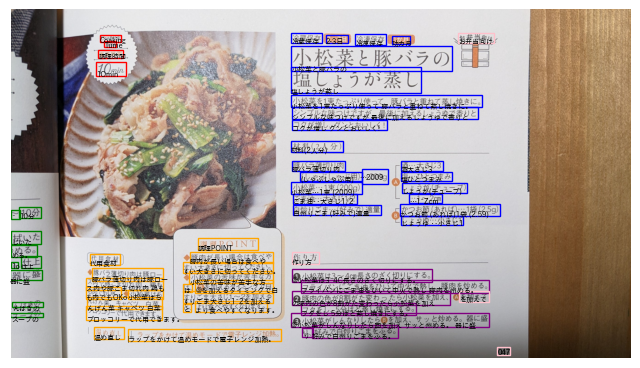

In [6]:
img_path = '../database/images/sample.jpg'
recipe = importer.image_to_recipe(img_path)
print(json.dumps(recipe,indent=4,ensure_ascii=False))